<a href="https://colab.research.google.com/github/Ishaqinu/Data_science_portfolio/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Dataset Overview

In [2]:
data=pd.read_csv('/content/weather.csv')
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,2013-03-09,Penrith,16.5,30.0,0.0,NaN,NaN,NE,26.0,...,41.0,NaN,NaN,NaN,NaN,21.6,29.4,No,0.0,No
24996,24996,2013-03-10,Penrith,16.7,30.5,0.0,NaN,NaN,NE,24.0,...,44.0,NaN,NaN,NaN,NaN,21.3,29.0,No,0.0,No
24997,24997,2013-03-11,Penrith,18.3,29.8,0.0,NaN,NaN,ENE,26.0,...,49.0,NaN,NaN,NaN,NaN,20.6,28.2,No,0.0,No
24998,24998,2013-03-12,Penrith,17.5,28.1,0.0,NaN,NaN,NNE,22.0,...,54.0,NaN,NaN,NaN,NaN,21.2,26.8,No,0.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25000 non-null  int64  
 1   Date           25000 non-null  object 
 2   Location       25000 non-null  object 
 3   MinTemp        24669 non-null  float64
 4   MaxTemp        24824 non-null  float64
 5   Rainfall       24721 non-null  float64
 6   Evaporation    9432 non-null   float64
 7   Sunshine       6664 non-null   float64
 8   WindGustDir    21543 non-null  object 
 9   WindGustSpeed  21545 non-null  float64
 10  WindDir9am     21928 non-null  object 
 11  WindDir3pm     23267 non-null  object 
 12  WindSpeed9am   24428 non-null  float64
 13  WindSpeed3pm   23770 non-null  float64
 14  Humidity9am    24609 non-null  float64
 15  Humidity3pm    23936 non-null  float64
 16  Pressure9am    20172 non-null  float64
 17  Pressure3pm    20173 non-null  float64
 18  Cloud9

In [4]:
data.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,25000.000000,24669.000000,24824.000000,24721.000000,9432.000000,6664.000000,21545.000000,24428.000000,23770.000000,24609.000000,23936.000000,20172.000000,20173.000000,14136.000000,13815.000000,24755.000000,24082.000000,25000.000000
mean,12499.500000,13.294568,23.990558,2.674467,5.825138,7.811945,37.772755,12.686917,16.837106,69.822951,52.762826,1018.173290,1015.627438,4.251556,4.409265,17.953084,22.507171,2.677376
std,7217.022701,5.848304,6.114348,9.720306,4.871567,3.718698,13.212331,9.136115,9.095719,17.755908,21.210121,6.481112,6.394829,2.968785,2.719235,5.394685,5.954540,9.705604
min,0.000000,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,0.000000
25%,6249.750000,8.900000,19.500000,0.000000,3.000000,5.500000,28.000000,6.000000,9.000000,58.000000,37.000000,1013.800000,1011.300000,1.000000,2.000000,14.200000,18.100000,0.000000
50%,12499.500000,14.000000,23.400000,0.000000,4.800000,8.900000,35.000000,11.000000,17.000000,71.000000,54.000000,1018.200000,1015.700000,5.000000,5.000000,18.400000,21.900000,0.000000
75%,18749.250000,17.900000,27.700000,0.600000,7.200000,10.600000,46.000000,19.000000,22.000000,83.000000,68.000000,1022.600000,1020.000000,7.000000,7.000000,21.900000,26.100000,0.800000
max,24999.000000,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000,371.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0         int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Data Preprocessing

In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.isna().sum()

Date                 0
Location             0
MinTemp            331
MaxTemp            176
Rainfall           279
Evaporation      15568
Sunshine         18336
WindGustDir       3457
WindGustSpeed     3455
WindDir9am        3072
WindDir3pm        1733
WindSpeed9am       572
WindSpeed3pm      1230
Humidity9am        391
Humidity3pm       1064
Pressure9am       4828
Pressure3pm       4827
Cloud9am         10864
Cloud3pm         11185
Temp9am            245
Temp3pm            918
RainToday          279
RISK_MM              0
RainTomorrow         0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data['Date']=pd.to_datetime(data['Date'])

Encoding

In [11]:
encoder=LabelEncoder()
cat_data=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in cat_data:
    data[col]=encoder.fit_transform(data[col])


In [12]:
# spliting target variable from dataset
x=data.iloc[:,:-1]
y=data['RainTomorrow']

In [13]:
num_data=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', 'RISK_MM']

In [14]:
x[num_data]=(x[num_data]-x[num_data].mean())/x[num_data].std()

EDA

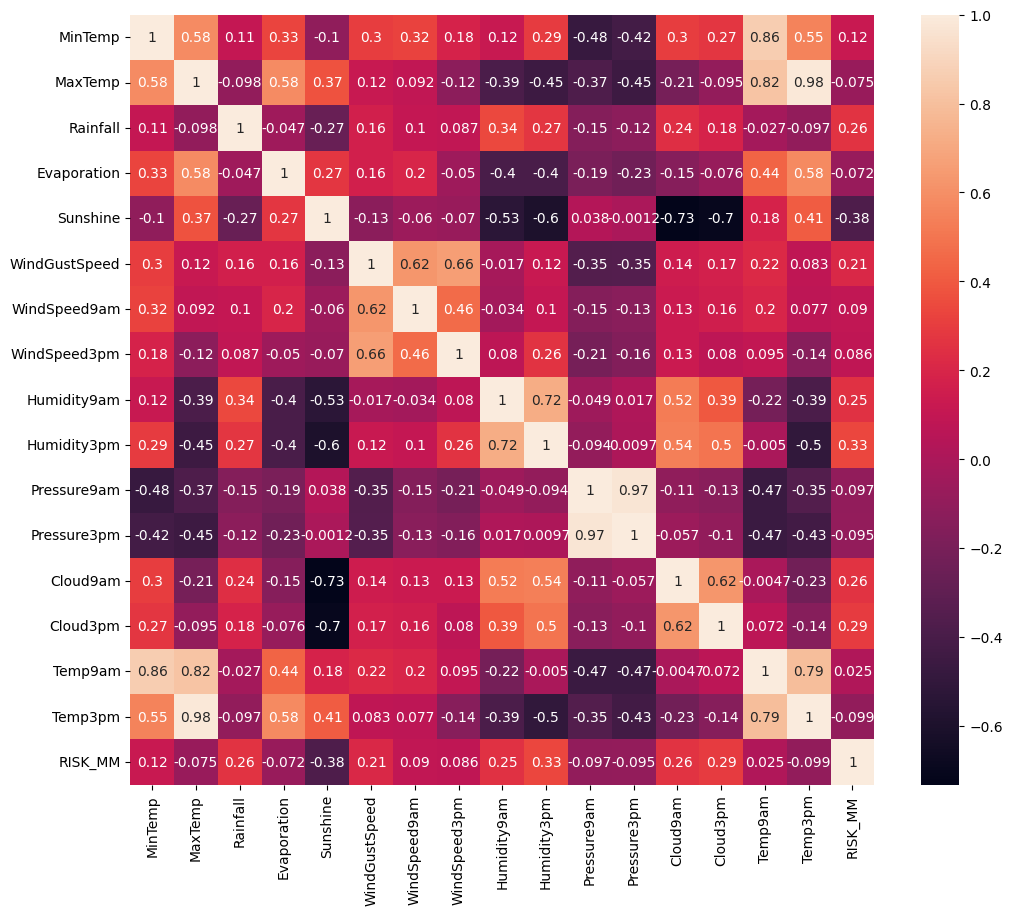

In [15]:
df=data[num_data]
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

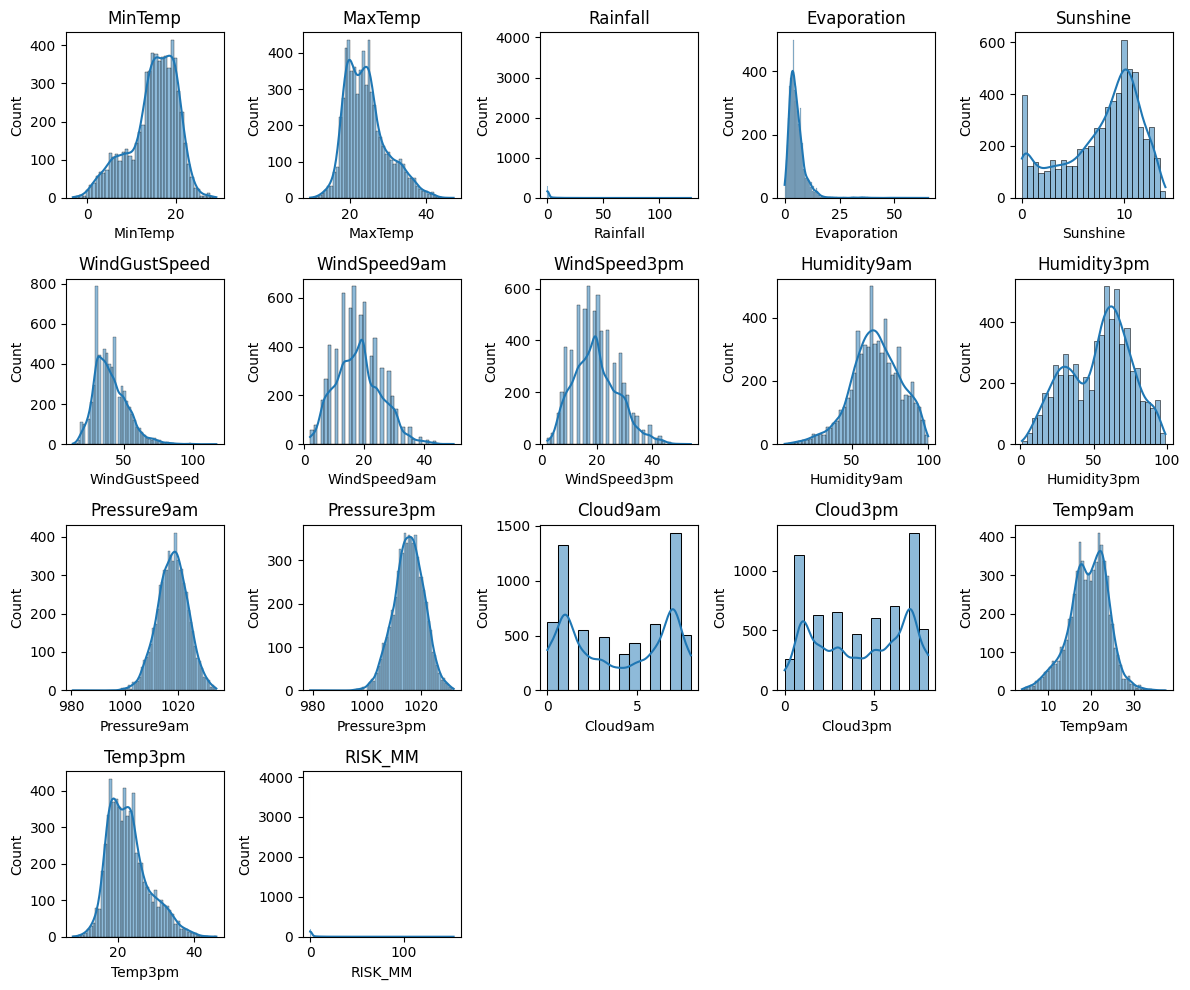

In [16]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_data):
    plt.subplot(4,5,i+1)
    sns.histplot(data[col],kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
data['year']=pd.to_datetime(data['Date']).dt.year
data['month']=pd.to_datetime(data['Date']).dt.month
data['day']=pd.to_datetime(data['Date']).dt.day

In [18]:
imputer=SimpleImputer(strategy='mean')
data[num_data]=imputer.fit_transform(data[num_data])


In [19]:
data.drop(['Date'],axis=1,inplace=True)

In [20]:
skewed_features=['Rainfall','Evaporation']
data[skewed_features]=np.log1p(data[skewed_features])

In [21]:
x=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

Model creation

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

Model Evaluation

In [24]:
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [25]:
print('Accuracy score',accuracy)
print('Classification Report',report)
print('Confusion Matrix',matrix)

Accuracy score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       1.00      1.00      1.00       369

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Confusion Matrix [[1204    0]
 [   0  369]]
